In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine


engine = create_engine("postgresql://postgres@localhost:5432/bike_store")

# data
df_customers = pd.read_csv('./data/customers.csv')
df_products = pd.read_csv('./data/products.csv')
df_orders = pd.read_csv('./data/orders.csv')
df_order_items = pd.read_csv('./data/order_items.csv')
df_brands = pd.read_csv('./data/brands.csv')
df_categories = pd.read_csv('./data/categories.csv')
df_stores = pd.read_csv('./data/stores.csv')
df_staffs = pd.read_csv('./data/staffs.csv')
df_stocks = pd.read_csv('./data/stocks.csv')

# PostgreSQL
df_customers.to_sql('customers', engine, if_exists='replace', index=False)
df_products.to_sql('products', engine, if_exists='replace', index=False)
df_orders.to_sql('orders', engine, if_exists='replace', index=False)
df_order_items.to_sql('order_items', engine, if_exists='replace', index=False)
df_brands.to_sql('brands', engine, if_exists='replace', index=False)
df_categories.to_sql('categories', engine, if_exists='replace', index=False)
df_stores.to_sql('stores', engine, if_exists='replace', index=False)
df_staffs.to_sql('staffs', engine, if_exists='replace', index=False)
df_stocks.to_sql('stocks', engine, if_exists='replace', index=False)

939

/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/2485378307.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/2485378307.py:31: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  sns.barplot(


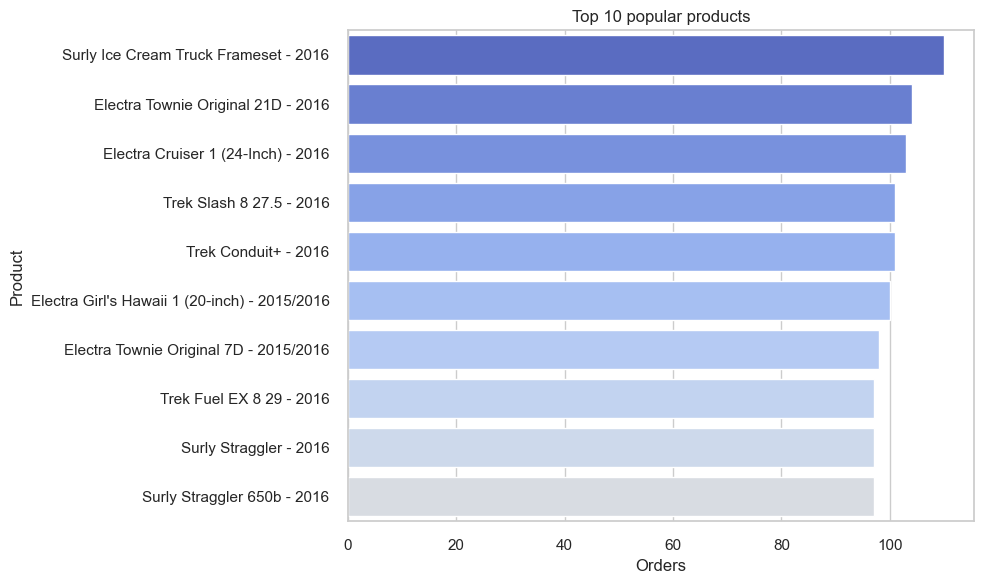

In [15]:
# What type of product, was the most popular?

query_pr = """
SELECT
    p.product_id,
    p.product_name,
    b.brand_name,
    p.list_price,
    COUNT(oi.order_id) AS total_orders
FROM
    products p
JOIN
    order_items oi ON p.product_id = oi.product_id 
JOIN
    brands b ON p.brand_id = b.brand_id
GROUP BY
    p.product_id,
    p.product_name,
    b.brand_name,
    p.list_price
ORDER BY
    total_orders DESC
LIMIT 20;
"""

result_pro = pd.read_sql(query_pr, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="crest")
sns.barplot(
    data=result_pro.head(10),
    x='total_orders',
    y='product_name',
    palette=sns.color_palette("coolwarm", len(result_pro))
)

plt.title('Top 10 popular products')
plt.xlabel('Orders')
plt.ylabel('Product')
plt.tight_layout()
plt.show()



/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/3838844808.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


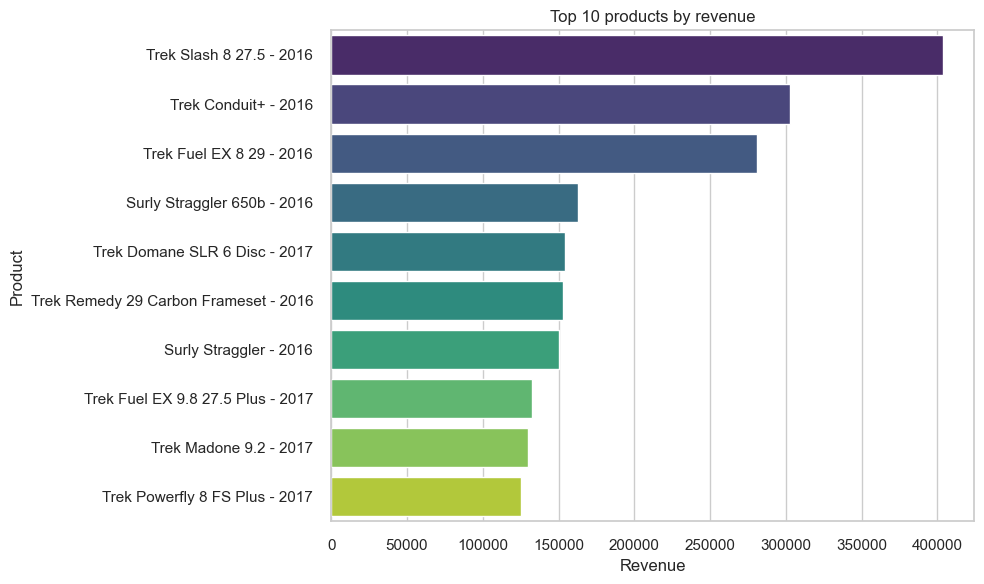

In [16]:
# How much money each product generated in sales?

query_rev = """
SELECT
    p.product_id,
    p.product_name,
    b.brand_name,
    p.list_price,
    COUNT(oi.order_id) AS total_orders,
    (p.list_price * COUNT(oi.order_id)) AS total_revenue
FROM
    products p
JOIN
    order_items oi ON p.product_id = oi.product_id 
JOIN
    brands b ON p.brand_id = b.brand_id
GROUP BY
    p.product_id,
    p.product_name,
    b.brand_name,
    p.list_price
ORDER BY
    total_revenue DESC
LIMIT 20;
"""

result_rev = pd.read_sql(query_rev, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))
sns.barplot(                                                                
    data=result_rev.head(10),
    x='total_revenue',
    y='product_name',
    palette='viridis'
)
plt.title('Top 10 products by revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()  

/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/3657507130.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


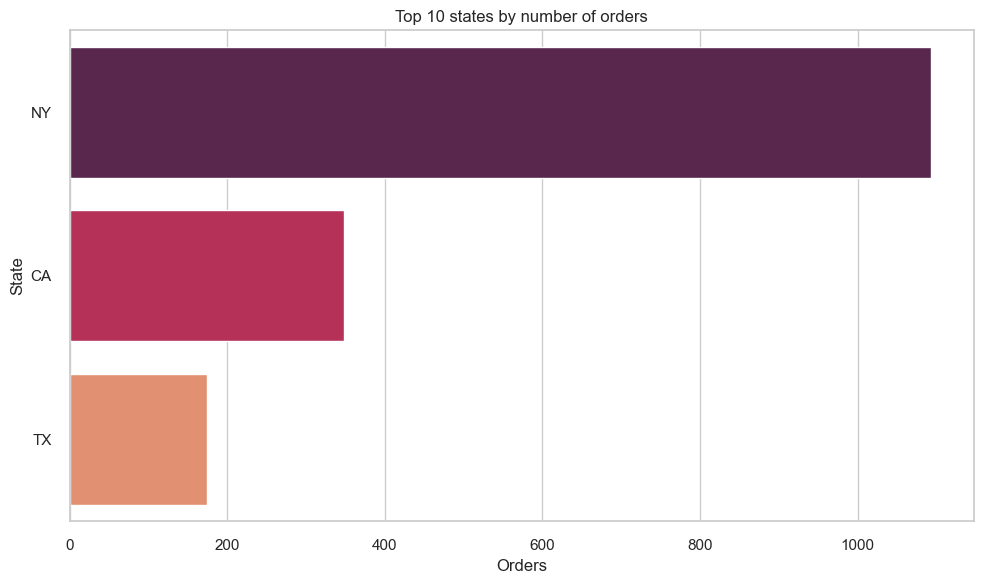

In [18]:
# Which state placed the most orders in total?

query_state = """
SELECT
    c.state,
    COUNT(o.order_id) AS total_orders
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
GROUP BY
    c.state
ORDER BY
    total_orders DESC;
    """

result_state = pd.read_sql(query_state, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))             
sns.barplot(                                                                
    data=result_state.head(10),
    x='total_orders',
    y='state',
    palette='rocket'
)   

plt.title('Top 10 states by number of orders')
plt.xlabel('Orders')
plt.ylabel('State')
plt.tight_layout()
plt.show()




/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/3779146991.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


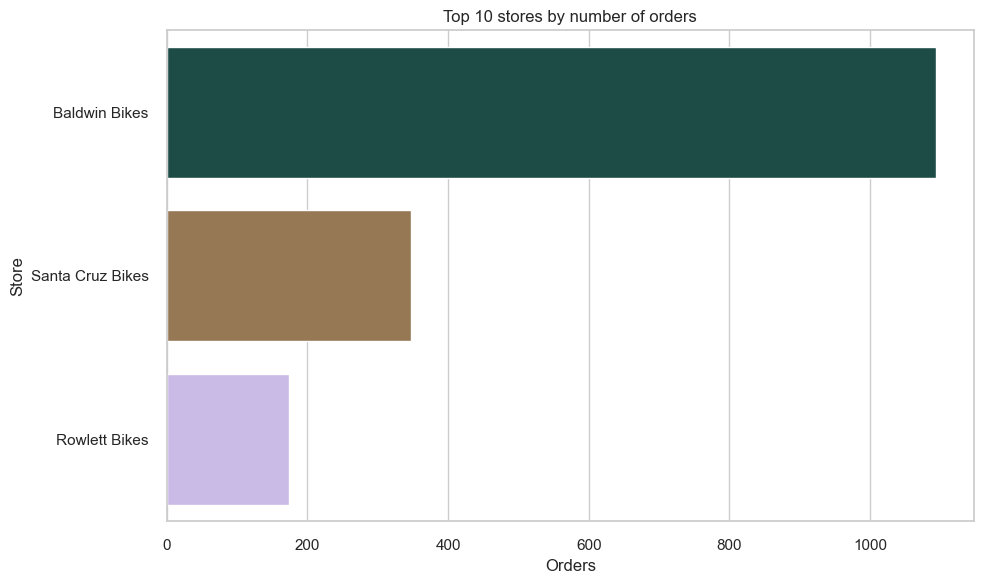

In [19]:
# Which stores handled the largest number of orders?

query_stores = """
SELECT
    s.store_name,
    s.city,
    COUNT(o.order_id) AS total_orders
FROM
    stores s 
JOIN
    orders o ON s.store_id = o.store_id
GROUP BY
    s.store_name,
    s.city
ORDER BY
    total_orders DESC;  
"""



result_stores = pd.read_sql(query_stores, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))             
sns.barplot(                                                                
    data=result_stores.head(10),                
    x='total_orders',
    y='store_name',
    palette='cubehelix'                              
)           

plt.title('Top 10 stores by number of orders')                  
plt.xlabel('Orders')
plt.ylabel('Store')
plt.tight_layout()  
plt.show()      

/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/4074876694.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


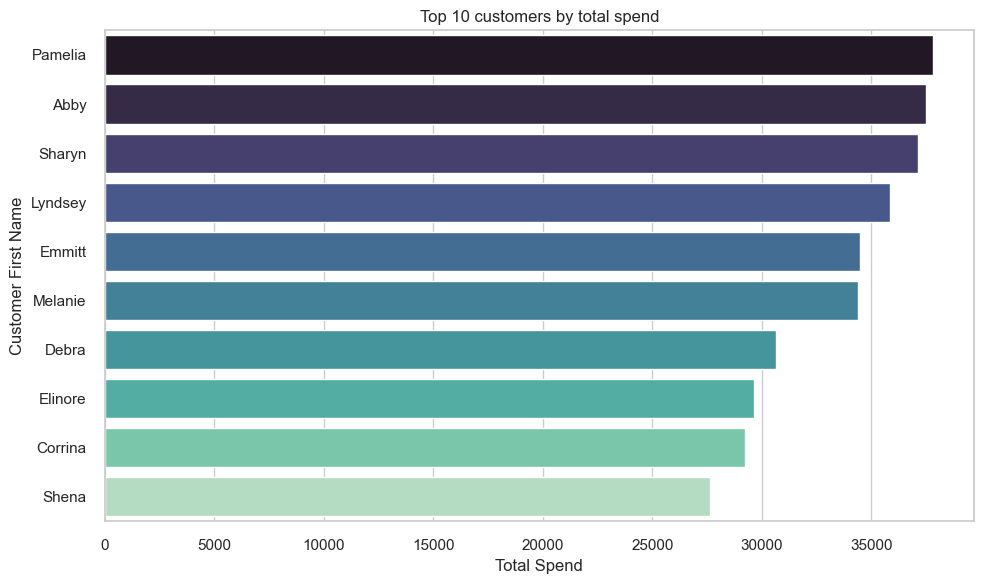

In [20]:
# Most valuable customers (by spend)

query_cust = """
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    c.city,
    COUNT(o.order_id) AS total_orders,
    SUM(oi.quantity * oi.list_price) AS total_spend_per_customer
FROM
    customers c 
JOIN
    orders o ON c.customer_id = o.customer_id
JOIN
    order_items oi ON o.order_id = oi.order_id
GROUP BY
    c.customer_id,
    c.first_name,
    c.last_name,
    c.city
ORDER BY
    total_spend_per_customer DESC
LIMIT 20;
"""



result_cust = pd.read_sql(query_cust, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))             
sns.barplot(                                                            
    data=result_cust.head(10),                
    x='total_spend_per_customer',
    y='first_name',
    palette='mako'                              
)
plt.title('Top 10 customers by total spend')              
plt.xlabel('Total Spend')               
plt.ylabel('Customer First Name')   
plt.tight_layout()  
plt.show()
    

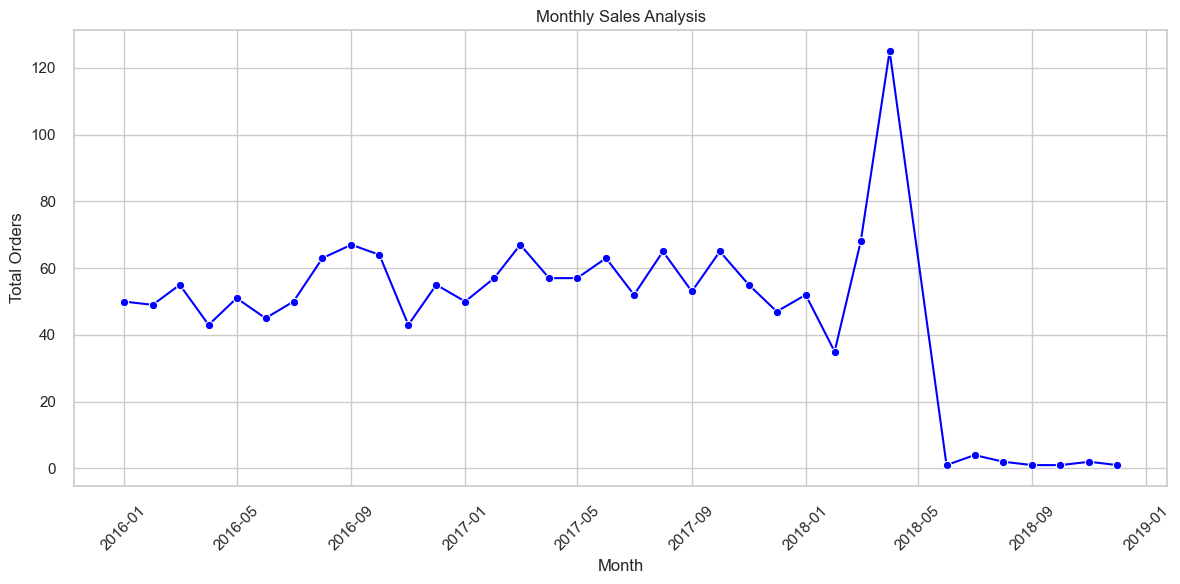

In [21]:
# Monthly Sales Analysis

query_monthly= """
SELECT
    DATE_TRUNC('month', TO_DATE(o.order_date, 'YYYY-MM_DD')) AS month,
    COUNT(o.order_id) AS total_orders
FROM
    orders o
GROUP BY
    month
ORDER BY
    month;
"""
result_monthly = pd.read_sql(query_monthly, engine)


# --- Visualisation ---
plt.figure(figsize=(12, 6))         
sns.lineplot(           
    data=result_monthly,                
    x='month',
    y='total_orders',
    marker='o',
    color='b'                              
)   
plt.title('Monthly Sales Analysis') 
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)                 
plt.tight_layout()  
plt.show()  

/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/3243080872.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


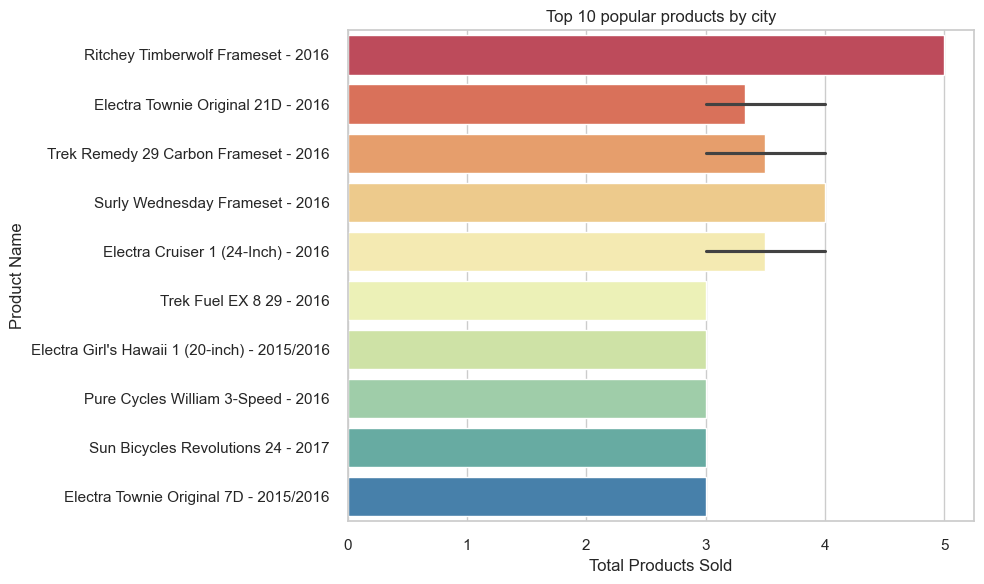

In [23]:
# The most popular products in a given city

query_pop_city= """
SELECT
    c.city,
    p.product_id,
    p.product_name,
    COUNT(oi.product_id) AS total_products_sold
FROM
    customers c 
JOIN
    orders o ON c.customer_id = o.customer_id
JOIN
    order_items oi ON o.order_id = oi.order_id
JOIN
    products p ON oi.product_id = p.product_id
GROUP BY
    c.city,
    p.product_id,
    p.product_name
ORDER BY
    total_products_sold DESC
LIMIT 20;
"""



result_pop_city = pd.read_sql(query_pop_city, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))             
sns.barplot(                                                            
    data=result_pop_city.head(15),                
    x='total_products_sold',
    y='product_name',
    palette='Spectral'                              
)           
plt.title('Top 10 popular products by city')            
plt.xlabel('Total Products Sold')               
plt.ylabel('Product Name')   
plt.tight_layout()  
plt.show()  

/var/folders/bt/sj8tbfrd4dbb88ph9y7d5h6m0000gn/T/ipykernel_45215/688611468.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


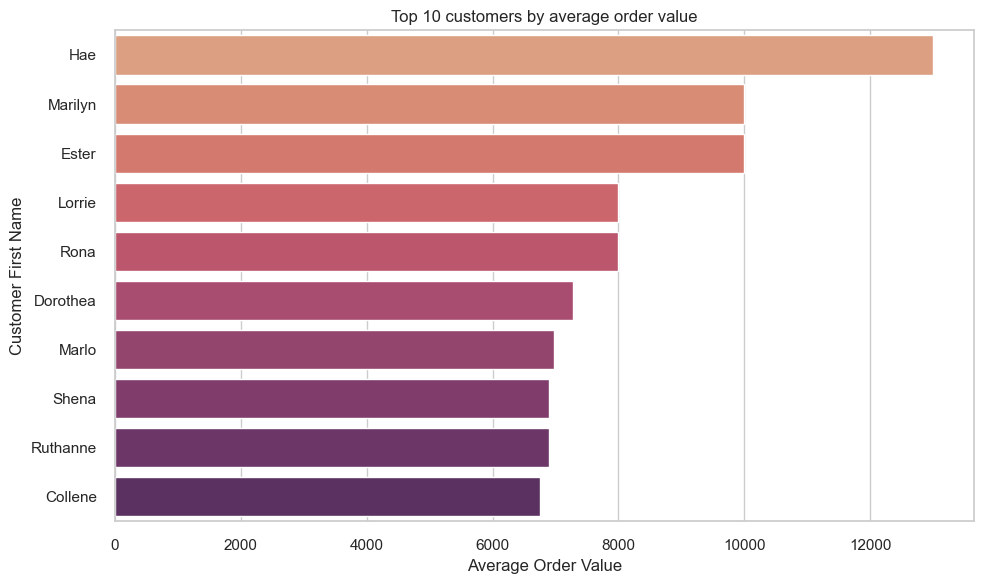

In [26]:
# Average order value per customer

query_avg= """
SELECT
    c.customer_id,
    c.first_name,
    c.last_name,
    AVG(oi.quantity *oi.list_price) AS avg_order_value
FROM
    customers c
JOIN
    orders o ON c.customer_id = o.customer_id
JOIN
    order_items oi ON o.order_id = oi.order_id

GROUP BY
    c.customer_id,
    c.first_name,
    c.last_name
ORDER BY
    avg_order_value DESC
LIMIT 20;
"""

result_avg = pd.read_sql(query_avg, engine)

# --- Visualisation ---
plt.figure(figsize=(10, 6))             
sns.barplot(                                                        
    data=result_avg.head(10),                
    x='avg_order_value',
    y='first_name',
    palette='flare'                              
)
plt.title('Top 10 customers by average order value')              
plt.xlabel('Average Order Value')               
plt.ylabel('Customer First Name')       
plt.tight_layout()          
plt.show()  